**Simple Linear regression**

Simple linear regression就是在二維平面上找出一個，能代表資料的一條直線，接下來我們會用TF來簡單跑一個simple linear regression。

首先，我們先在製造一些fake data，以及先define W以及b。

In [14]:
import tensorflow as tf
import numpy as np

# Parameters.
learning_rate = 0.1
training_steps = 1000
display_step = 100
n_samples = 50

#Create dataset
X = np.random.rand(n_samples).astype(np.float32)
Y = X * 10 + 5
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.zeros([1]))

接下來Define linear regression以及其loss function

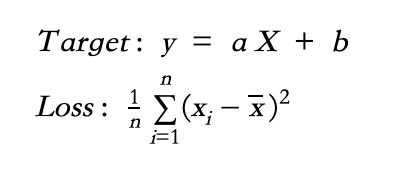

In [15]:
#Define LR and Loss function (MSE)
def linear_regression(x):
  return W * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_sum(tf.pow(y_pred - y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate=0.001)

In [16]:
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [17]:
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization() 
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 100, loss: 42.953232, W: 0.291793, b: 0.955367
step: 200, loss: 33.561615, W: 0.774817, b: 1.795121
step: 300, loss: 26.272608, W: 1.203593, b: 2.533049
step: 400, loss: 20.614973, W: 1.584569, b: 3.181294
step: 500, loss: 16.223110, W: 1.923425, b: 3.750551
step: 600, loss: 12.813354, W: 2.225164, b: 4.250240
step: 700, loss: 10.165592, W: 2.494192, b: 4.688662
step: 800, loss: 8.109073, W: 2.734394, b: 5.073123
step: 900, loss: 6.511293, W: 2.949187, b: 5.410065
step: 1000, loss: 5.269467, W: 3.141583, b: 5.705158


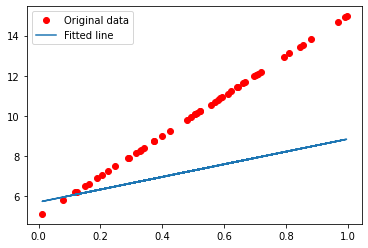

In [18]:
import matplotlib.pyplot as plt

# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()